In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sys
import os

In [2]:
DF = pd.read_table('toefl.csv', header=0, sep=',')
DF

,id,gender,listen,grammar,reading
0,1,FEMALE,40,50,56
1,2,FEMALE,33,44,46
2,3,MALE,39,44,47
3,4,FEMALE,44,55,66
4,5,MALE,43,56,53
...,...,...,...,...,...
95,96,FEMALE,43,48,56
96,97,MALE,50,54,60
97,98,MALE,55,50,67
98,99,FEMALE,53,61,66


In [3]:
DF.dtypes

id          int64
gender     object
listen      int64
grammar     int64
reading     int64
dtype: object

In [4]:
DF['gender'] = DF.gender.astype('category')

In [5]:
DF.dtypes

id            int64
gender     category
listen        int64
grammar       int64
reading       int64
dtype: object

In [6]:
DF['gender'].cat.reorder_categories(['MALE', 'FEMALE'], inplace=True)

In [7]:
DF['gendernum'] = DF['gender'].cat.codes

In [8]:
DF.head()

,id,gender,listen,grammar,reading,gendernum
0,1,FEMALE,40,50,56,1
1,2,FEMALE,33,44,46,1
2,3,MALE,39,44,47,0
3,4,FEMALE,44,55,66,1
4,5,MALE,43,56,53,0


In [9]:
DF['grade'] = np.round((DF['listen'] + DF['grammar'] + DF['reading']) / 3 * 10, 0)

In [10]:
DF.head()

,id,gender,listen,grammar,reading,gendernum,grade
0,1,FEMALE,40,50,56,1,487.0
1,2,FEMALE,33,44,46,1,410.0
2,3,MALE,39,44,47,0,433.0
3,4,FEMALE,44,55,66,1,550.0
4,5,MALE,43,56,53,0,507.0


In [11]:
DF['grade'].describe()

count    100.000000
mean     504.760000
std       63.272079
min      350.000000
25%      462.250000
50%      498.500000
75%      544.000000
max      647.000000
Name: grade, dtype: float64

In [12]:
DF['grade'].describe()['std'] * DF['grade'].describe()['std']

4003.3559595959596

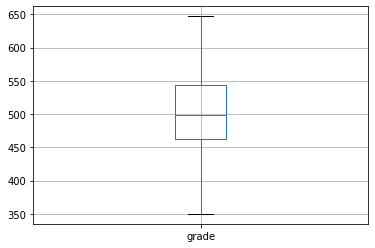

In [13]:
DF.plot(y='grade', kind='box', grid=True)

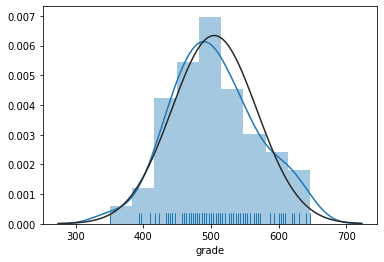

In [14]:
sns.distplot(DF.grade, rug = True, fit=stats.norm)

In [15]:
DF[['grade', 'gender']].groupby('gender').describe()

grade                                                          
       count        mean        std    min    25%    50%    75%    max
gender                                                                
MALE    41.0  509.975610  62.618084  350.0  467.0  507.0  550.0  647.0
FEMALE  59.0  501.135593  64.004433  350.0  460.0  490.0  538.5  640.0

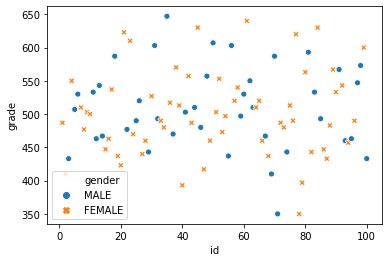

In [16]:
sns.scatterplot(x='id', y='grade', hue='gender', style='gender', data=DF)

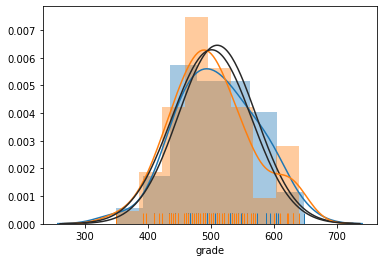

In [17]:
sns.distplot(DF.grade[DF.gendernum==0], rug=True, fit=stats.norm)
sns.distplot(DF.grade[DF.gendernum==1], rug=True, fit=stats.norm)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016BA15CA048>,
      dtype=object)

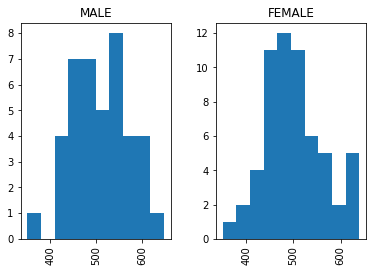

In [18]:
DF.hist(column='grade', by='gender')

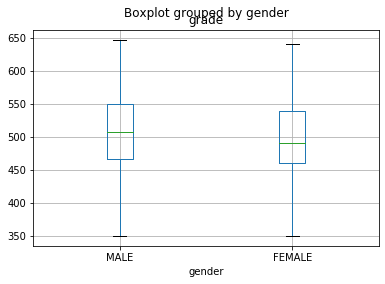

In [19]:
DF.boxplot(column='grade', by='gender')

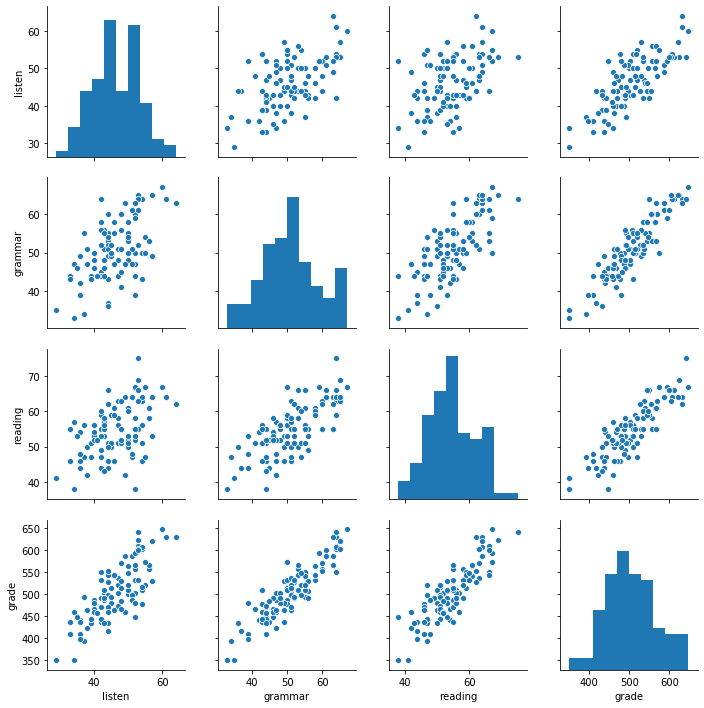

In [20]:
sns.pairplot(DF, vars=['listen', 'grammar', 'reading', 'grade'], diag_kind='hist')
plt.show()

In [21]:
DF['support'] = np.where(DF['grade'] >= 500, 1,
                        np.where(DF['grade'] >= 450, 2,
                        np.where(DF['grade'] >= 400, 3, 4)))

In [22]:
DF.head()

,id,gender,listen,grammar,reading,gendernum,grade,support
0,1,FEMALE,40,50,56,1,487.0,2
1,2,FEMALE,33,44,46,1,410.0,3
2,3,MALE,39,44,47,0,433.0,3
3,4,FEMALE,44,55,66,1,550.0,1
4,5,MALE,43,56,53,0,507.0,1


In [23]:
DF['exemption'] = np.where(DF['support'] <= 2, 1, 0)

In [24]:
DF.head()

,id,gender,listen,grammar,reading,gendernum,grade,support,exemption
0,1,FEMALE,40,50,56,1,487.0,2,1
1,2,FEMALE,33,44,46,1,410.0,3,0
2,3,MALE,39,44,47,0,433.0,3,0
3,4,FEMALE,44,55,66,1,550.0,1,1
4,5,MALE,43,56,53,0,507.0,1,1


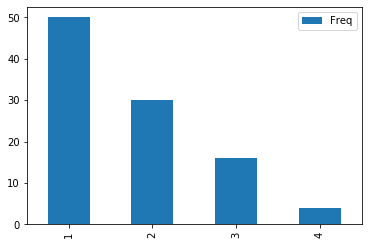

In [25]:
sufreq = DF.support.value_counts()
suprop = sufreq / sum(sufreq)
sutbl = pd.concat([sufreq, suprop], axis=1)
sutbl.columns = ['Freq', 'Prop']
sutbl
sutbl.plot.bar(y='Freq')

In [26]:
sutbl

,Freq,Prop
1,50,0.50
2,30,0.30
3,16,0.16
4,4,0.04


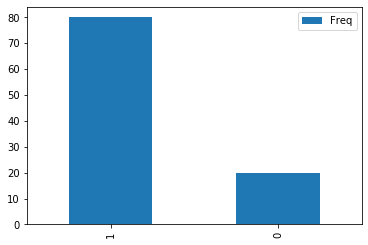

In [27]:
exfreq = DF.exemption.value_counts()
exprop = exfreq / sum(exfreq)
extbl = pd.concat([exfreq, exprop], axis=1)
extbl.columns = ['Freq', 'Prop']
extbl
extbl.plot.bar(y='Freq')

In [28]:
extbl

,Freq,Prop
1,80,0.8
0,20,0.2


In [29]:
sutbl = pd.crosstab(index=DF.support, columns=DF.exemption, margins=True)
sutbl

exemption,0,1,All
support,,,
1,0,50,50
2,0,30,30
3,16,0,16
4,4,0,4
All,20,80,100
